**In Vehicle Coupon Usage Prediction Based on Passenger Preferrences**

yellow-coupons-free-oil-change-vouchers-with-gift-discount-car-service-set-certificates-with-isometric-illustration-gas-station-tickets-with-offer-vehicle-maintenance_107791-3853.avif

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing data
df=pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

In [ ]:
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
234,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1~3,1~3,1~3,1.0,0.0,0.0,1.0,0.0,0.0
3598,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,41,Married partner,...,4~8,gt8,gt8,1~3,1.0,1.0,0.0,0.0,1.0,1.0
5309,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),2h,Male,21,Unmarried partner,...,less1,4~8,1~3,1~3,1.0,0.0,0.0,0.0,1.0,0.0


Data preprocessing


We will consider the empty column as nill because we dont know weather the person has visted bar,coffee place.... or not so that this type of data can be classified into a separate category.

In [ ]:
df['car'].fillna(0, inplace=True)
df['car'].replace(['Scooter and motorcycle','crossover','do not drive'],0, inplace=True)
df['car'].replace(['Mazda5','Car that is too old to install Onstar :D'],1, inplace=True)
df['Bar'].fillna('nill', inplace=True)
df['CoffeeHouse'].fillna('nill', inplace=True)
df['CarryAway'].fillna('nill', inplace=True)
df['RestaurantLessThan20'].fillna('nill', inplace=True)
df['Restaurant20To50'].fillna('nill', inplace=True)

Encoding the data to use classification algorithms

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12282,2,0,2,2,4,3,1,1,1,2,...,2,1,1,1,0,0,0,1,0,0
12283,1,1,2,2,3,4,1,0,6,4,...,5,1,0,5,0,0,0,0,1,1
12284,1,1,2,2,1,0,0,0,6,4,...,5,1,0,5,0,1,0,0,1,0
12285,1,1,2,1,1,0,1,0,6,4,...,5,1,0,5,0,1,0,0,1,0
12286,1,1,2,0,0,1,1,0,6,4,...,4,5,5,5,1,2,2,2,2,2


To know the important columns in the data set

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X .= df.drop('Y', axis=1)
y = df['Y']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                 Feature  Importance
5                 coupon    0.110222
12            occupation    0.087543
13                income    0.073599
8                    age    0.065143
16           CoffeeHouse    0.063626
4                   time    0.054962
15                   Bar    0.054509
11             education    0.050546
17             CarryAway    0.048782
18  RestaurantLessThan20    0.047352
19      Restaurant20To50    0.044781
9          maritalStatus    0.040246
3            temperature    0.035295
1              passanger    0.034723
6             expiration    0.032487
21     toCoupon_GEQ15min    0.027814
0            destination    0.024594
7                 gender    0.023973
2                weather    0.021483
10          has_children    0.020243
22     toCoupon_GEQ25min    0.014437
24         direction_opp    0.011645
23        direction_same    0.010880
14                   car    0.001089
20      toCoupon_GEQ5min    0.000025


1.Now our data is completely clean now we can start fit our data into ml algorithm where 'Y' is our target variable which tells that the coupon is used or not

In [ ]:
x=df[['coupon','occupation','income','CoffeeHouse','age','Bar','time','education','CarryAway']]
y=df['Y']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=0)
from sklearn.preprocessing import StandardScaler
sx=StandardScaler()
xtrain=sx.fit_transform(xtrain)
xtest=sx.transform(xtest)

Lets try different algorithms and will select the best classification algorithm that gives the best accuracy


1. Coupon Usage Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypredl=model.predict(xtest)
ypredl

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypredl)

0.5877483443708609

Checking for Overfitting or underfitting

In [ ]:
print('training.set accuracy:{:.4f}'.format(model.score(xtrain,ytrain)))
print('test.set accuracy:{:.4f}'.format(model.score(xtest,ytest)))

training.set accuracy:0.6019
test.set accuracy:0.5877


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypredr=model.predict(xtest)
ypredr

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
ypredr=rfc.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypredr)

0.7081362346263008

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(xtrain,ytrain)
ypredd=dec.predict(xtest)
accuracy_score(ytest,ypredd)

0.6792809839167455

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(xtrain,ytrain)
ypreds=svm.predict(xtest)
accuracy_score(ytest,ypreds)

0.6771523178807947

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypredk=knn.predict(xtest)
accuracy_score(ytest,ypredk)

0.6568117313150426

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
ypredg=gnb.predict(xtest)
accuracy_score(ytest,ypredg)

0.5946073793755913

from the above algorithms we have highest accuracy for Random Forest algorithm for coupon usage prediction.

2.passenger segmentation

In [ ]:
y=df.passanger
x=df[['age','income','maritalStatus','education','occupation','Y','car','toCoupon_GEQ25min','toCoupon_GEQ15min','toCoupon_GEQ5min','destination','coupon','expiration','CoffeeHouse','Bar','CarryAway','direction_same','direction_opp','gender','time','temperature','has_children','Restaurant20To50','RestaurantLessThan20','weather']]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
nfeatures = 10
selector = SelectKBest(score_func=f_classif, k=nfeatures)
X_new = selector.fit_transform(x, y)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
#We are performing these steps to get the best features for our clustering algorithm to get accurate result.
from sklearn.preprocessing import StandardScaler
num_features_to_select = 10
if num_features_to_select > x.shape[1]:
    num_features_to_select = x.shape[1]
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(x, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features_dg= x.iloc[:, selected_feature_indices]
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features_dg)
selected_feature_names = x.columns[selected_feature_indices]
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['maritalStatus', 'Y', 'toCoupon_GEQ25min', 'toCoupon_GEQ15min',
       'destination', 'direction_same', 'direction_opp', 'time',
       'has_children', 'weather'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
feature=selected_features_dg
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_labels = kmeans.labels_
df['cluster_center'] = cluster_labels
for i in range(5):
    df.loc[df['cluster'] == i, 'cluster_center'] = i
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=selected_features_dg.columns))
print("\nNumber of Passengers in Each Cluster:")
print(df['cluster'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   maritalStatus         Y  toCoupon_GEQ25min  toCoupon_GEQ15min  \
0       1.724138  0.427719       1.000000e+00           1.000000   
1       1.742782  0.598425       9.853229e-16           0.226378   
2       2.115779  0.606464      -1.929013e-15           0.540875   
3       1.010338  0.560464       9.398496e-04           0.634085   
4       1.726667  0.561667      -4.163336e-17           0.333333   

    destination  direction_same  direction_opp      time  has_children  \
0  1.377984e+00   -2.470246e-15   1.000000e+00  3.385279      0.394562   
1 -1.221245e-15    1.000000e+00  -8.326673e-15  2.380577      0.376640   
2  9.735741e-01    4.329870e-15   1.000000e+00  1.750570      0.084030   
3  9.436090e-01   -6.245005e-15   1.000000e+00  1.763471      0.992794   
4  2.000000e+00    1.000000e+00  -7.882583e-15  4.000000      0.394167   

    weather  
0  1.348143  
1  1.779528  
2  1.747719  
3  1.764411  
4  1.644167  

Number of Passengers in Each Cluster:
2    5

We used clustering algorithm to separate the passengers according to their tastes and other features after the application of the above algorithm we got 5 clusters

In [ ]:
# for sum of squared distance
from sklearn.datasets import make_blobs
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 66034.40326984355


In [ ]:
dm=pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

In [ ]:
dm['car'].fillna(0, inplace=True)
dm['car'].replace(['Scooter and motorcycle','crossover','do not drive'],0, inplace=True)
dm['car'].replace(['Mazda5','Car that is too old to install Onstar :D'],1, inplace=True)
dm['Bar'].fillna('nill', inplace=True)
dm['CoffeeHouse'].fillna('nill', inplace=True)
dm['CarryAway'].fillna('nill', inplace=True)
dm['RestaurantLessThan20'].fillna('nill', inplace=True)
dm['Restaurant20To50'].fillna('nill', inplace=True)
dm.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [ ]:
#dm['time'] = dm['time'].astype(str).str.replace(r'\s?[APap][Mm]$', '', regex=True)

In [ ]:
# Function to convert time in format "Xam" or "Xpm" to 24-hour format
def convert_to_24_hour(time_str):
    try:
        hour = int(time_str[:-2])
        if "pm" in time_str.lower():
            if hour != 12:
                hour += 12
        else:
            if hour == 12:
                hour = 0
        return hour
    except (ValueError, IndexError):
        return None  # Return None for invalid or missing time values

# Apply the conversion function to the 'time' column
dm['time_24_hour'] = dm['time'].apply(convert_to_24_hour)

# Print the modified DataFrame
dm.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time_24_hour
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,nill,4~8,1~3,1,0,0,0,1,1,14
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,nill,4~8,1~3,1,0,0,0,1,0,10
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,nill,4~8,1~3,1,1,0,0,1,1,10
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,nill,4~8,1~3,1,1,0,0,1,0,14
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,nill,4~8,1~3,1,1,0,0,1,0,14


In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  int64 
 15  Bar                   12684 non-null

3. Coupon Effectiveness Analysis

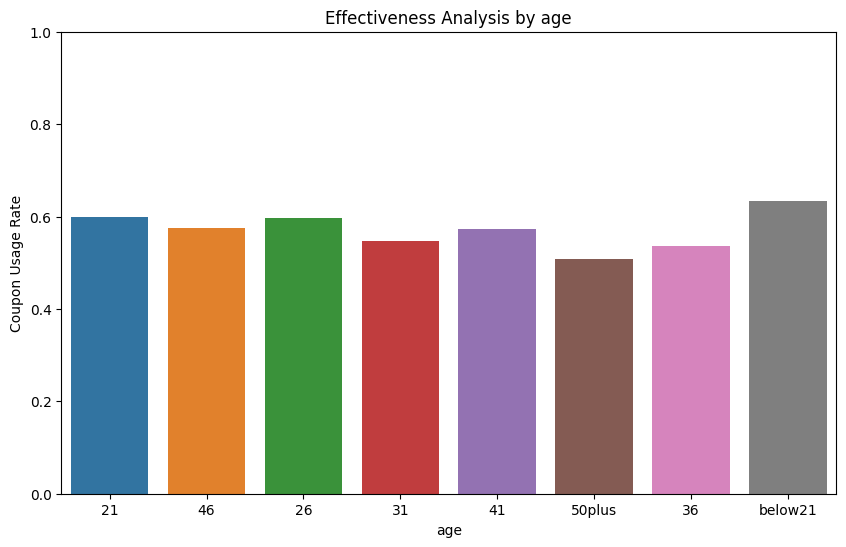

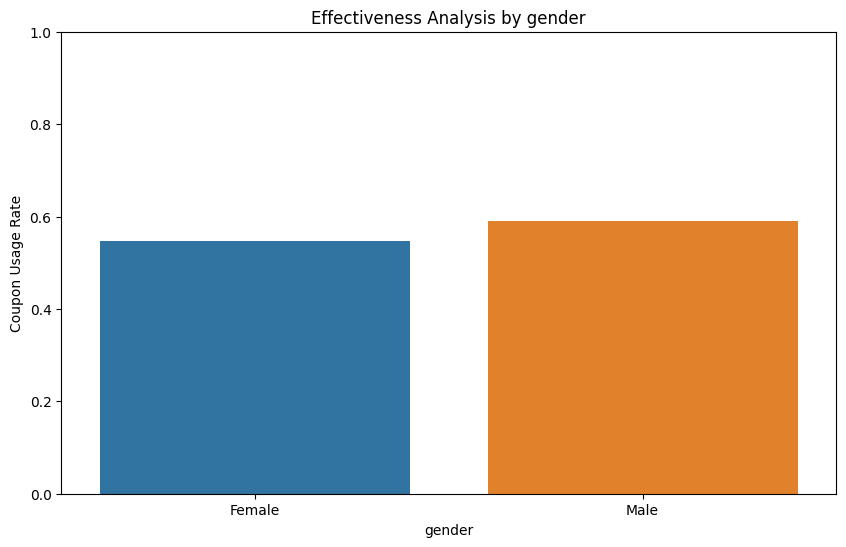

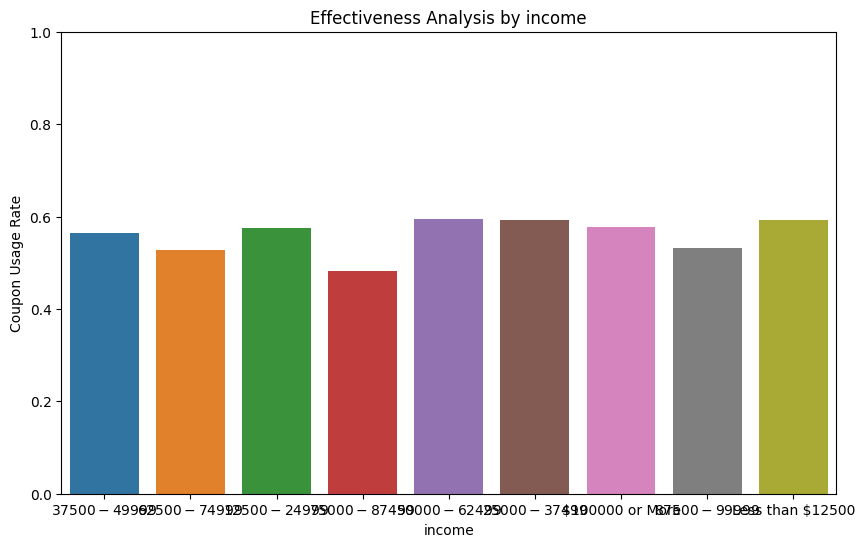

In [ ]:
# Analyze effectiveness based on passenger characteristics
passenger_characteristics = dm[['age', 'gender', 'income']]
for char in passenger_characteristics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=char, y='Y', data=dm, estimator=np.mean, errorbar=None)
    plt.title(f'Effectiveness Analysis by {char}')
    plt.xlabel(char)
    plt.ylabel('Coupon Usage Rate')
    plt.ylim(0, 1)
    plt.show()

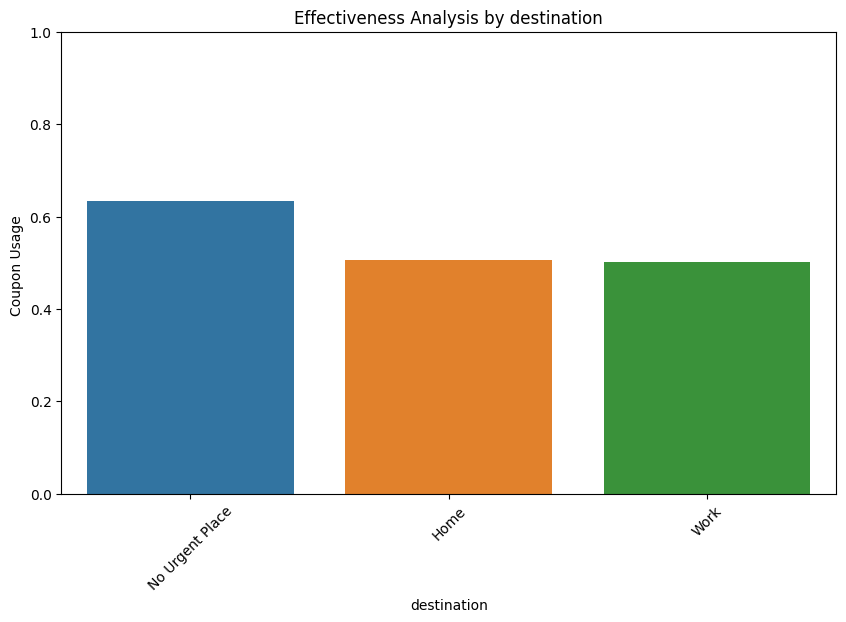

In [ ]:
# Analyze effectiveness based on usage destination
plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='Y', data=dm, estimator=np.mean,errorbar=None)
plt.title('Effectiveness Analysis by destination')
plt.xlabel('destination')
plt.ylabel('Coupon Usage ')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


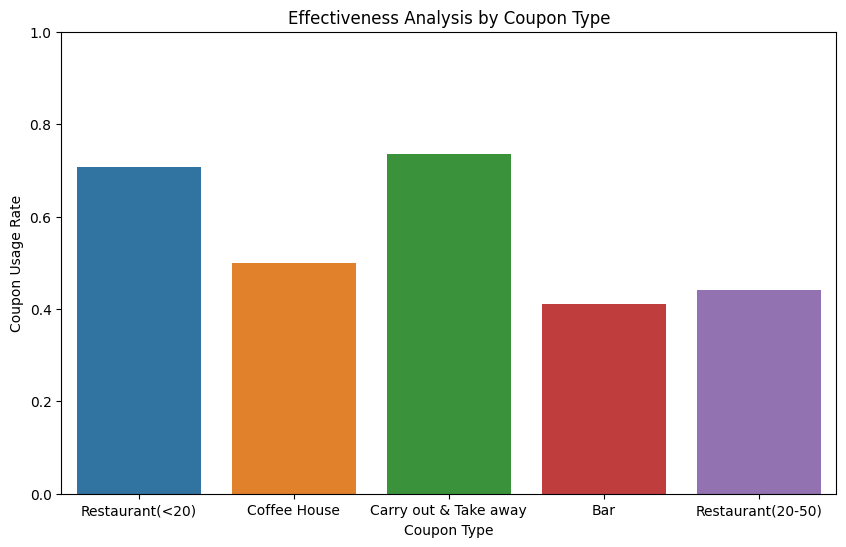

In [ ]:
# Analyze effectiveness based on coupon type
plt.figure(figsize=(10, 6))
sns.barplot(x='coupon', y='Y', data=dm, estimator=np.mean, errorbar=None)
plt.title('Effectiveness Analysis by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Usage Rate')
plt.ylim(0, 1)
plt.show()

Here from the above vizualizations we can understand that usage of coupon is high when he/she is free,these coupons are mostly used by the youngsters whose salaries or income level ranges from 50000-62000,25000-37499

In [ ]:
d= pd.DataFrame(dm[['coupon','weather','temperature','time_24_hour']])

In [ ]:
d

,coupon,weather,temperature,time_24_hour
0,Restaurant(<20),Sunny,55,14
1,Coffee House,Sunny,80,10
2,Carry out & Take away,Sunny,80,10
3,Coffee House,Sunny,80,14
4,Coffee House,Sunny,80,14
...,...,...,...,...
12679,Carry out & Take away,Rainy,55,18
12680,Carry out & Take away,Rainy,55,7
12681,Coffee House,Snowy,30,7
12682,Bar,Snowy,30,7


4.Coupon Usage Trends

<Axes: xlabel='coupon', ylabel='time_24_hour'>

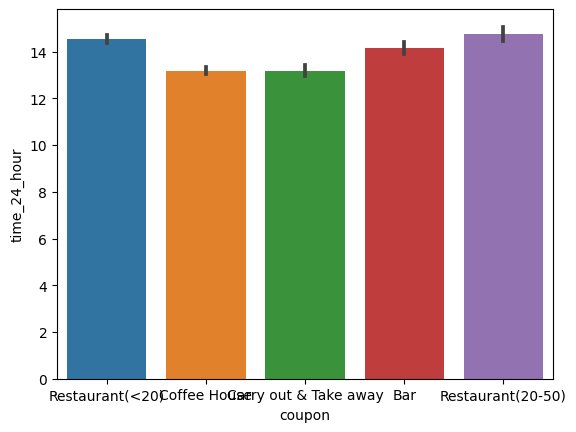

In [ ]:
sns.barplot(x=d['coupon'],y=d['time_24_hour'])

<Axes: xlabel='weather', ylabel='time_24_hour'>

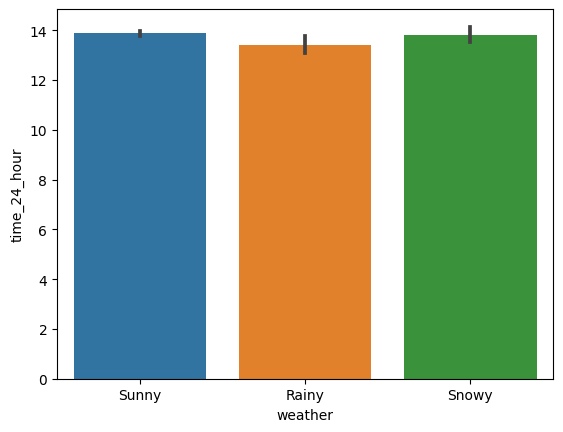

In [ ]:
sns.barplot(x=d['weather'],y=d['time_24_hour'])

<Axes: xlabel='temperature', ylabel='time_24_hour'>

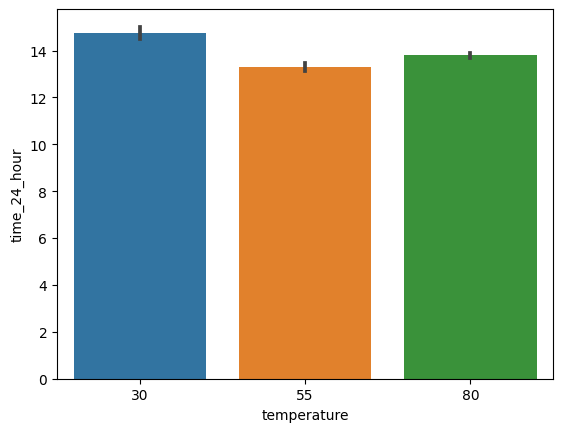

In [ ]:
sns.barplot(x=d['temperature'],y=d['time_24_hour'])

Use of coupons is high when its sunny and snowy and in the case of temperature when its 30 then the use of coupons is high

5. Customer Behavior Analysis

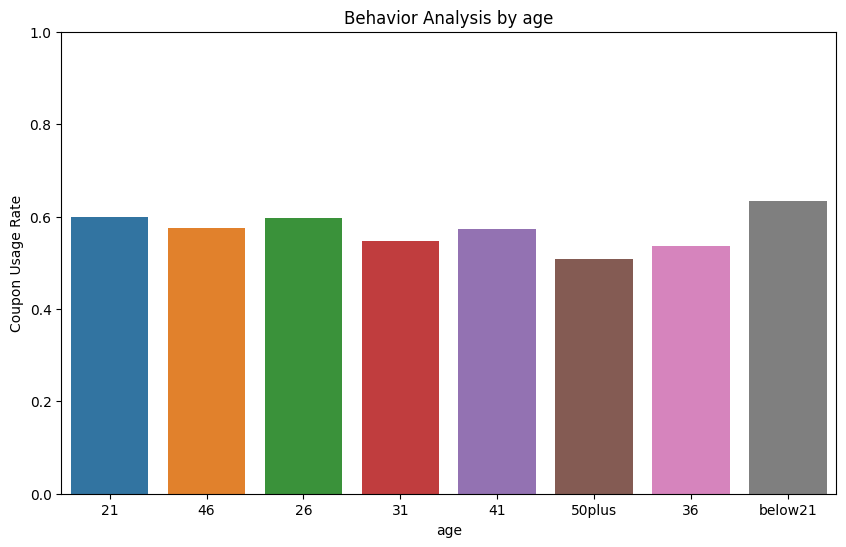

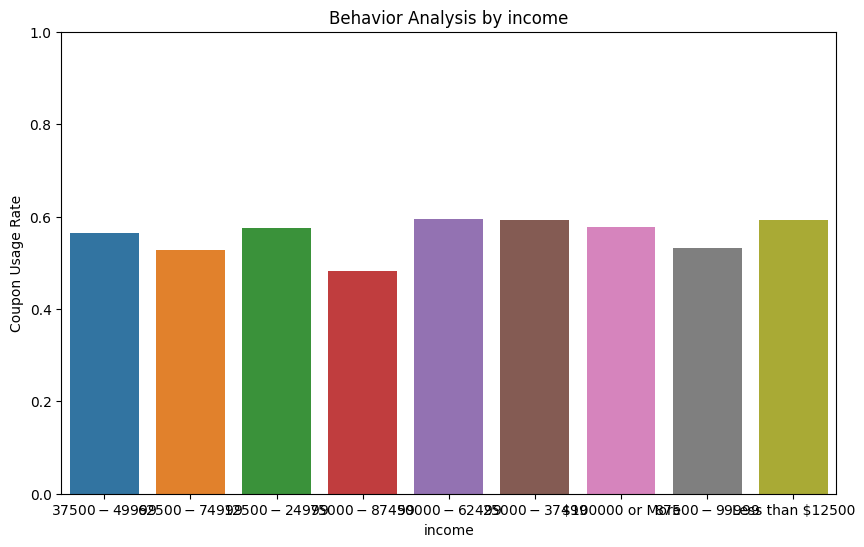

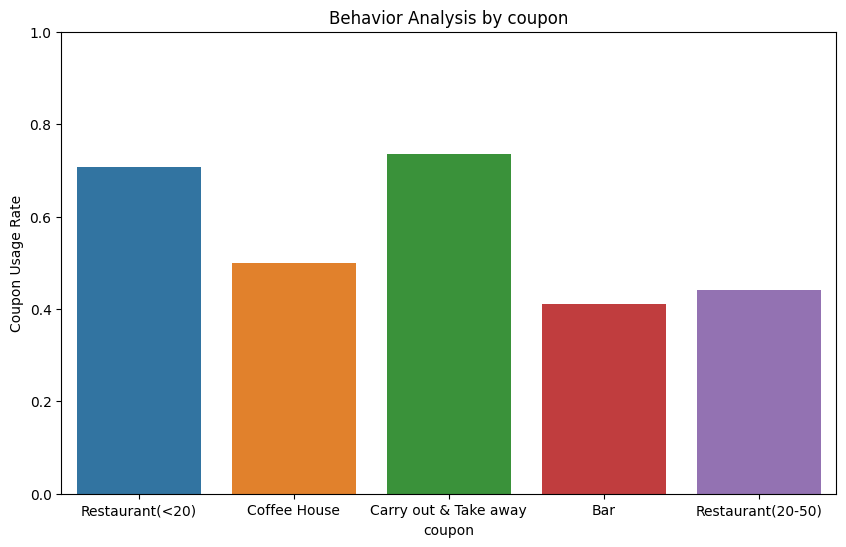

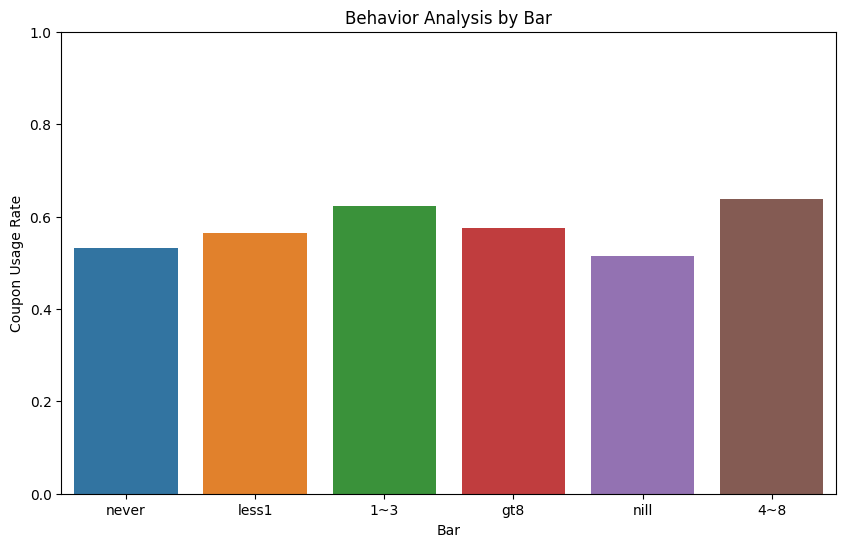

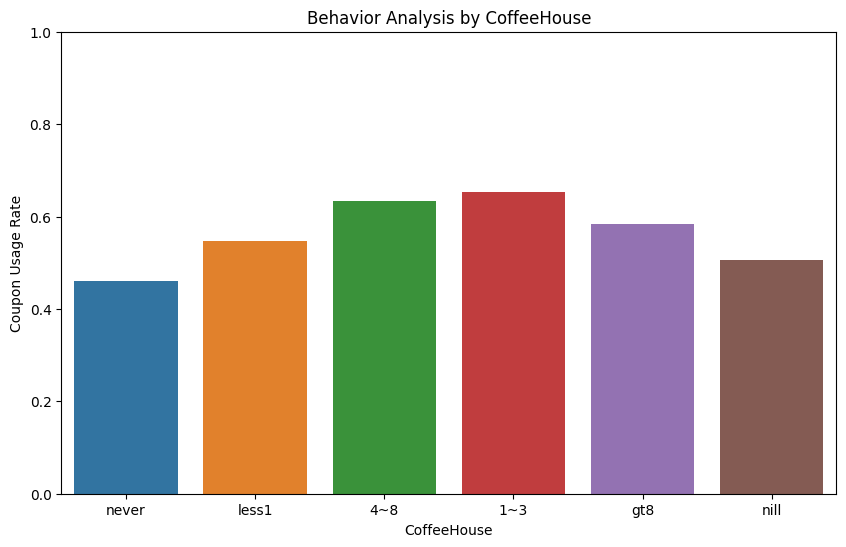

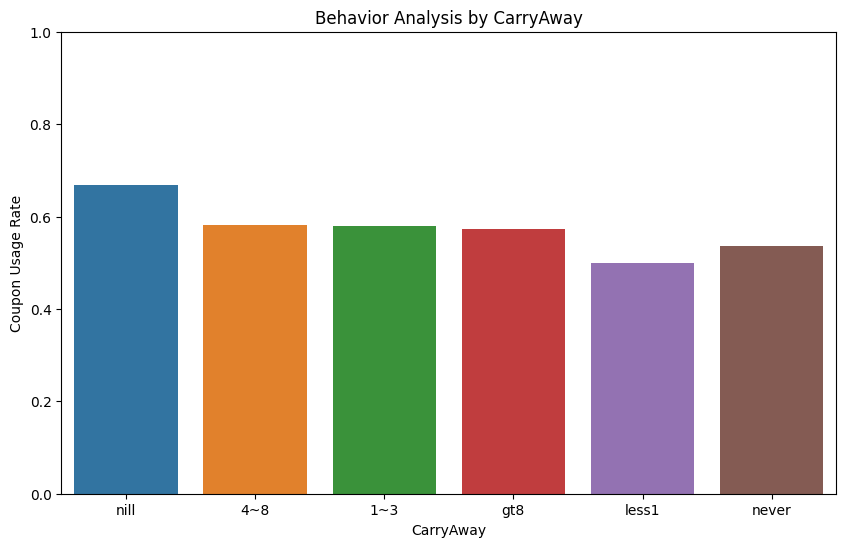

In [ ]:
Behaviour= dm[['age','income','coupon','Bar','CoffeeHouse','CarryAway']]
for char in Behaviour:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=char, y='Y', data=dm, estimator=np.mean, errorbar=None)
    plt.title(f'Behavior Analysis by {char}')
    plt.xlabel(char)
    plt.ylabel('Coupon Usage Rate')
    plt.ylim(0, 1)
    plt.show()

Here the coupon usage is greater when the passenger is frequently visiting the places like bars,coffeehouses etc and that too it is high among youngsters.

6.Location-Based Analysis

Text(0.5, 1.0, 'Relation for coupon usage according to their destination')

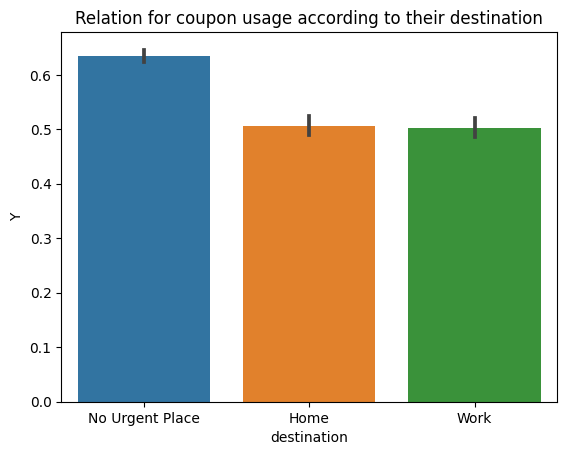

In [ ]:
x1=dm['destination']
x2=dm['Bar']
x3=dm['CoffeeHouse']
x4=dm['CarryAway']
x5=dm['RestaurantLessThan20']
x6=dm['Restaurant20To50']
x7=dm['direction_same']
x8=dm['direction_opp']
y=dm['Y']
sns.barplot(x=x1, y=y)
plt.title('Relation for coupon usage according to their destination')

Text(0.5, 1.0, 'coupon usage according to their bar visiting counts')

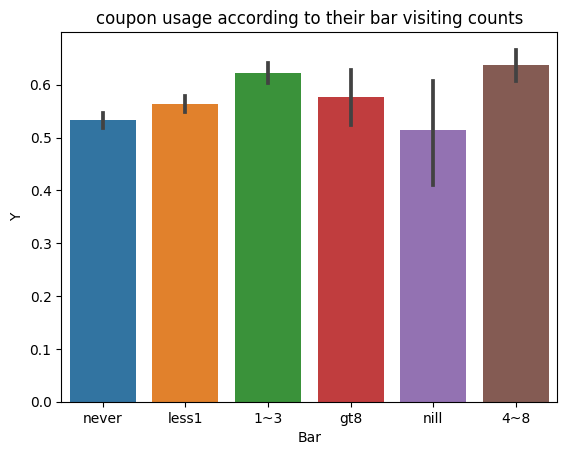

In [ ]:
sns.barplot(x=x2, y=y)
plt.title('coupon usage according to their bar visiting counts')

Text(0.5, 1.0, 'coupon usage according to their coffeehouse visiting counts')

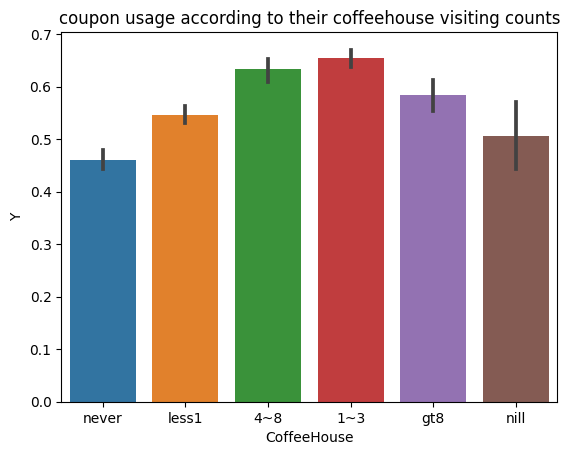

In [ ]:
sns.barplot(x=x3,y= y)
plt.title('coupon usage according to their coffeehouse visiting counts')


Text(0.5, 1.0, 'coupon usage according to their carry away  count')

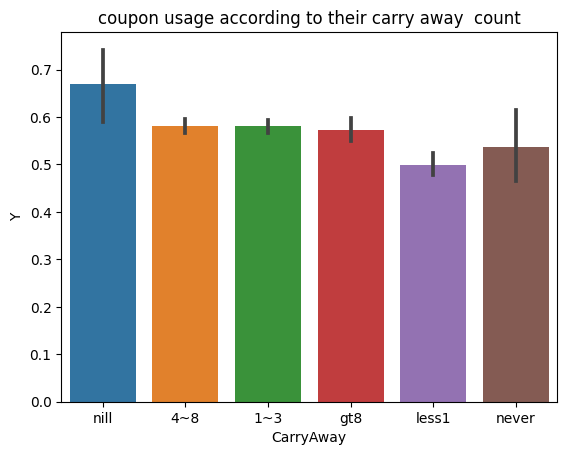

In [ ]:
sns.barplot(x=x4,y= y)
plt.title('coupon usage according to their carry away  count')

Text(0.5, 1.0, 'coupon usage according to their restuarent that costs less than $20 visiting counts')

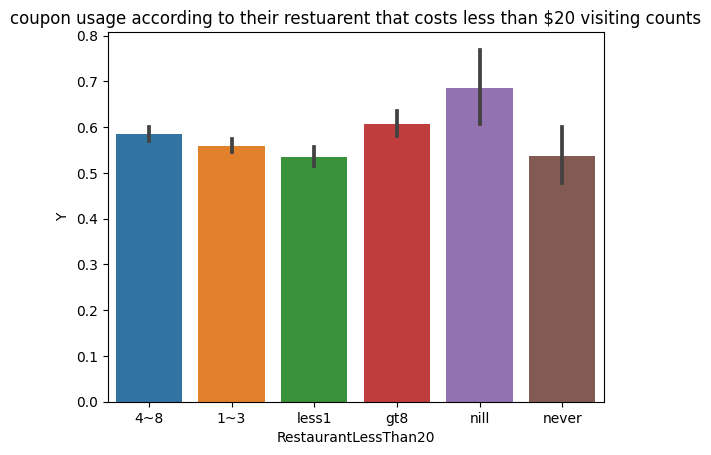

In [ ]:
sns.barplot(x=x5,y= y)
plt.title('coupon usage according to their restuarent that costs less than $20 visiting counts')

Text(0.5, 1.0, 'coupon usage according to their restuarent that costs between $20 to $50  visiting counts')

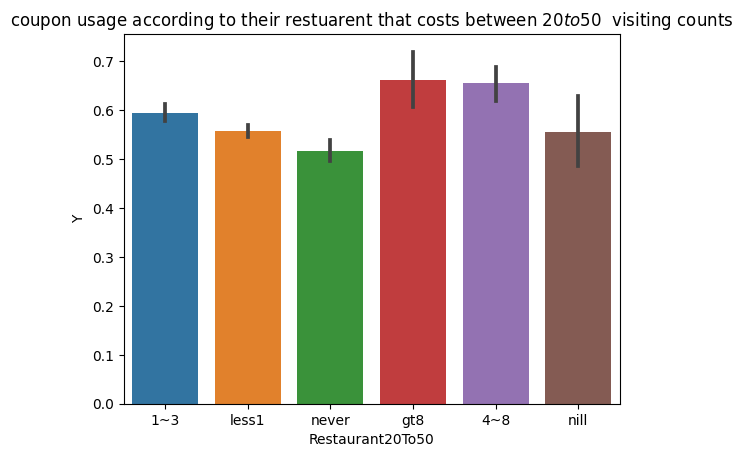

In [ ]:
sns.barplot(x=x6,y= y)
plt.title('coupon usage according to their restuarent that costs between $20 to $50  visiting counts')

Text(0.5, 1.0, 'coupon usage when the location and their destination are same')

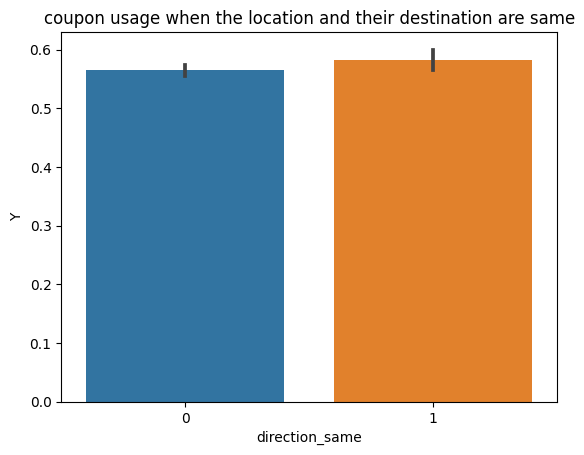

In [ ]:
sns.barplot(x=x7,y= y)
plt.title('coupon usage when the location and their destination are same')

Text(0.5, 1.0, 'coupon usage when their coupon location and their destination are opposite sides')

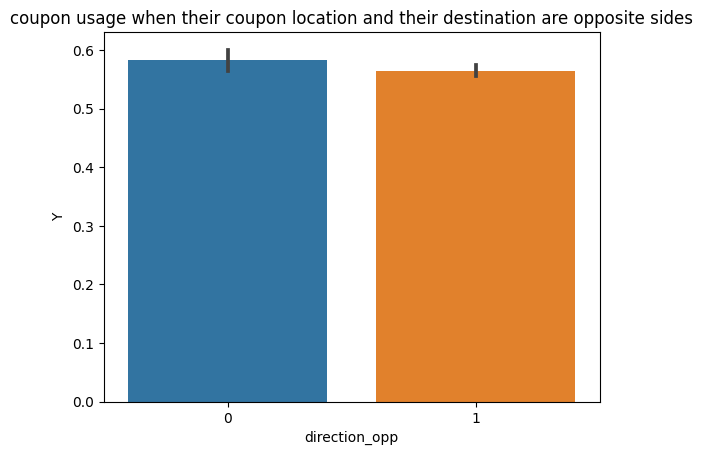

In [ ]:
sns.barplot(x=x8,y= y)
plt.title('coupon usage when their coupon location and their destination are opposite sides')

According to the above charts we can understand the usage of the coupons is increasing when the destination and locations are in same direction.when people are visiting bars,coffehouses,carry away and restuarants are using coupons effectively.So when we are recommanding coupons we should recommand them to the people who visits these places often and according to the directions.

7. Time-of-Day Analysis

<Axes: xlabel='Y', ylabel='time'>

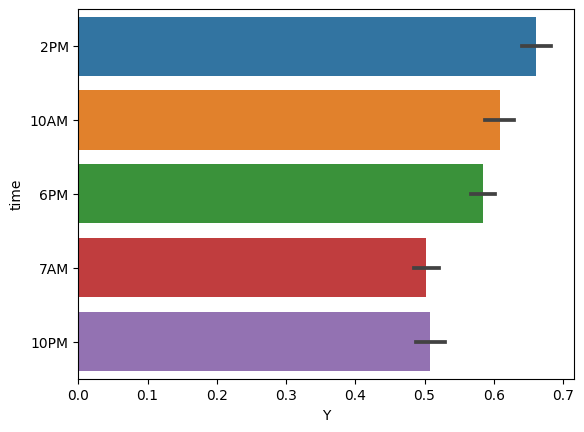

In [ ]:
x=dm['time']
y=dm['Y']
sns.barplot(y=x,x=y)

From the above chart we can know that at 2pm which is normally lunch time the usage of coupon is high

8.Influence of Education and Occupation

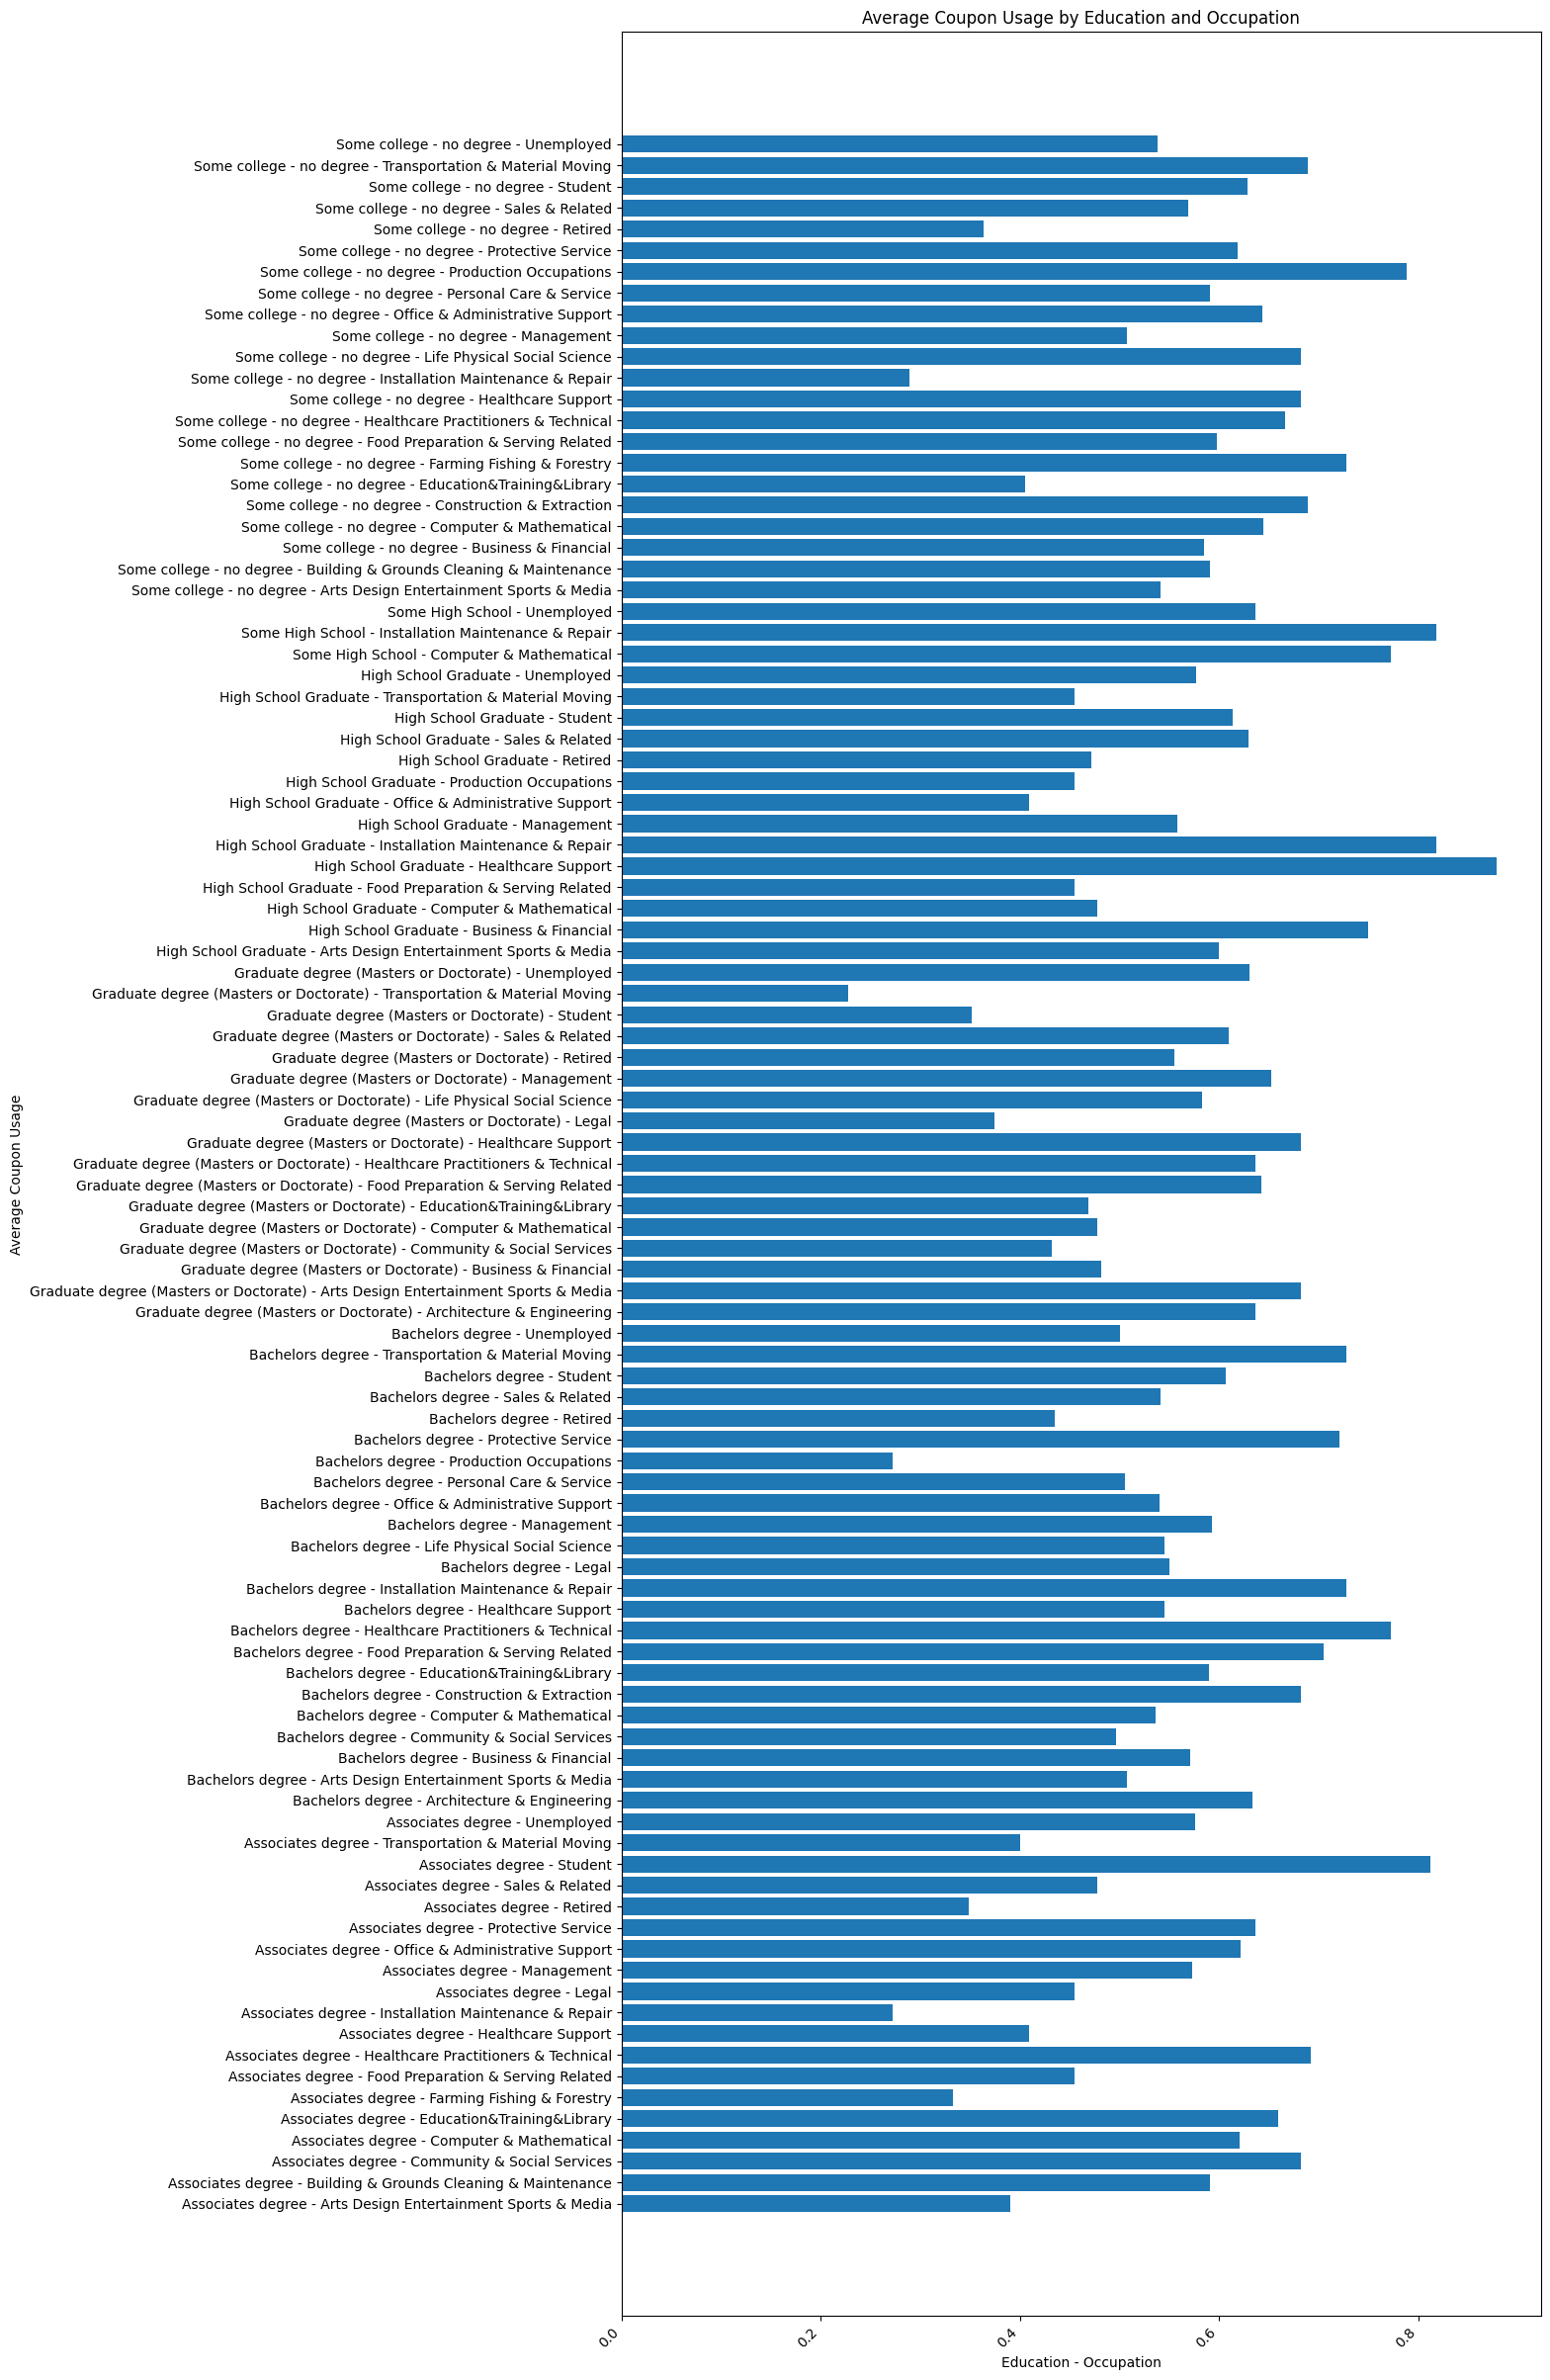

In [ ]:
grouped_data = dm.groupby(['education', 'occupation'])['Y'].mean().reset_index()

# Creating the bar chart
plt.figure(figsize=(12, 30))
plt.barh(range(len(grouped_data)), grouped_data['Y'], tick_label=grouped_data['education'] + ' - ' + grouped_data['occupation'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education - Occupation')
plt.ylabel('Average Coupon Usage')
plt.title('Average Coupon Usage by Education and Occupation')
plt.show()

By observing the above graph we can say that poeple with education background of high school and whose occupation is health care support are using coupons frequently.Here we can't say that people who studied much are using and how aren't educated are not using.The thing we can conclude here is their is a little influence of education and occupation but not completely.

9.Coupon Expiration Impact

In [ ]:
gru=dm.groupby('expiration')
gru['Y'].mean()

expiration
1d    0.625582
2h    0.495977
Name: Y, dtype: float64

<Axes: xlabel='expiration', ylabel='Y'>

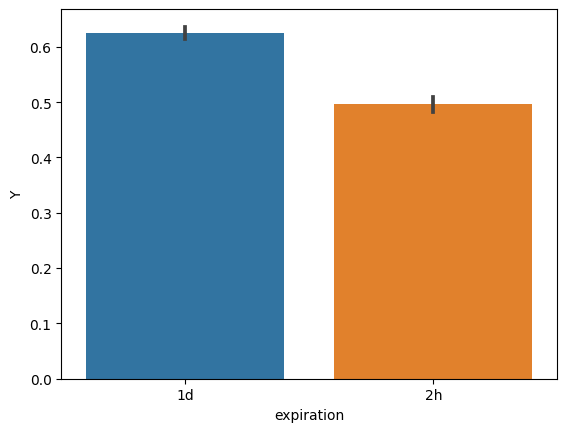

In [ ]:
sns.barplot(x=dm['expiration'],y=dm['Y'])

By this we say can people are using the coupon when they are about to get expired.

10.Impact of Distance

In [ ]:
gru=dm.groupby('coupon')['Y'].sum().reset_index()
gru

,coupon,Y
0,Bar,827
1,Carry out & Take away,1760
2,Coffee House,1995
3,Restaurant(20-50),658
4,Restaurant(<20),1970


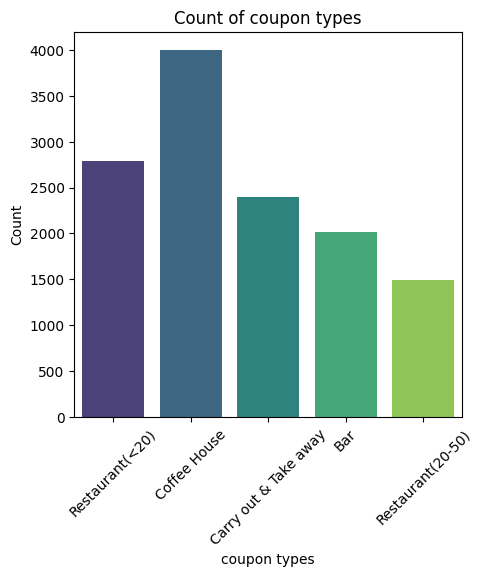

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='coupon', data=dm, palette='viridis')
plt.title('Count of coupon types')
plt.xlabel('coupon types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
gru=dm.groupby('coupon')['Y','direction_same','direction_opp'].sum().reset_index()
gr=pd.DataFrame(gru)
gr

<ipython-input-62-06603d616934>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gru=dm.groupby('coupon')['Y','direction_same','direction_opp'].sum().reset_index()


,coupon,Y,direction_same,direction_opp
0,Bar,827,422,1595
1,Carry out & Take away,1760,793,1600
2,Coffee House,1995,750,3246
3,Restaurant(20-50),658,257,1235
4,Restaurant(<20),1970,502,2284


<Axes: xlabel='Y', ylabel='direction_opp'>

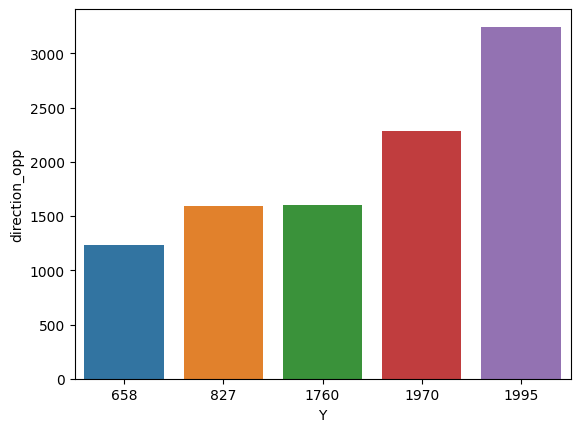

In [ ]:
sns.barplot(x=gr['Y'],y=gr['direction_opp'])

<Axes: xlabel='Y', ylabel='direction_same'>

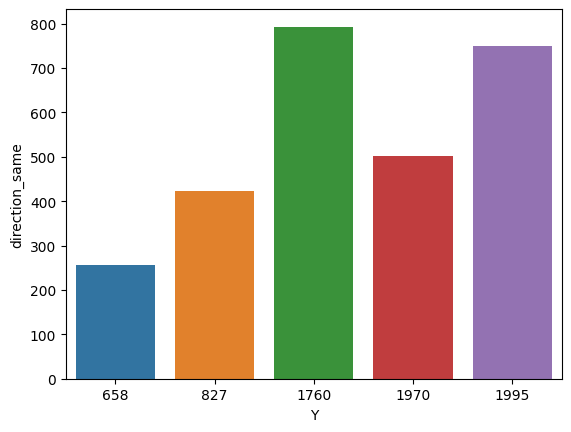

In [ ]:
sns.barplot(x=gr['Y'],y=gr['direction_same'])

Use of couon highest when people vist the restaurant that costs less than $20 even if it is in the opposite direction its the same with coffee house

11.Marital Status and Family Impact

In [ ]:
grup=dm.groupby('maritalStatus')['Y','has_children'].sum().reset_index()
g=pd.DataFrame(grup)
g

<ipython-input-65-97046003e122>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grup=dm.groupby('maritalStatus')['Y','has_children'].sum().reset_index()


,maritalStatus,Y,has_children
0,Divorced,273,472
1,Married partner,2769,3557
2,Single,2879,592
3,Unmarried partner,1227,546
4,Widowed,62,86


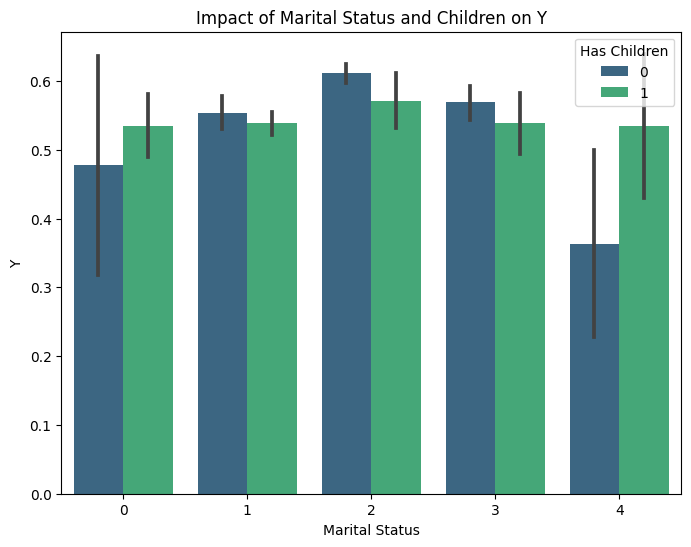

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='maritalStatus', y='Y', hue='has_children', data=df, palette='viridis')
plt.title('Impact of Marital Status and Children on Y')
plt.xlabel('Marital Status')
plt.ylabel('Y')
plt.legend(title='Has Children')
plt.show()

By this graph we can understand that singles are using coupons a lot and in all other cases usage of coupons is same.

12.Car Ownership and Coupon Usage

In [ ]:
cc=dm.groupby('coupon')['car','Y'].sum().reset_index()
c=pd.DataFrame(cc)
c

<ipython-input-67-3e34bc28eaee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cc=dm.groupby('coupon')['car','Y'].sum().reset_index()


,coupon,car,Y
0,Bar,5,827
1,Carry out & Take away,8,1760
2,Coffee House,13,1995
3,Restaurant(20-50),6,658
4,Restaurant(<20),11,1970


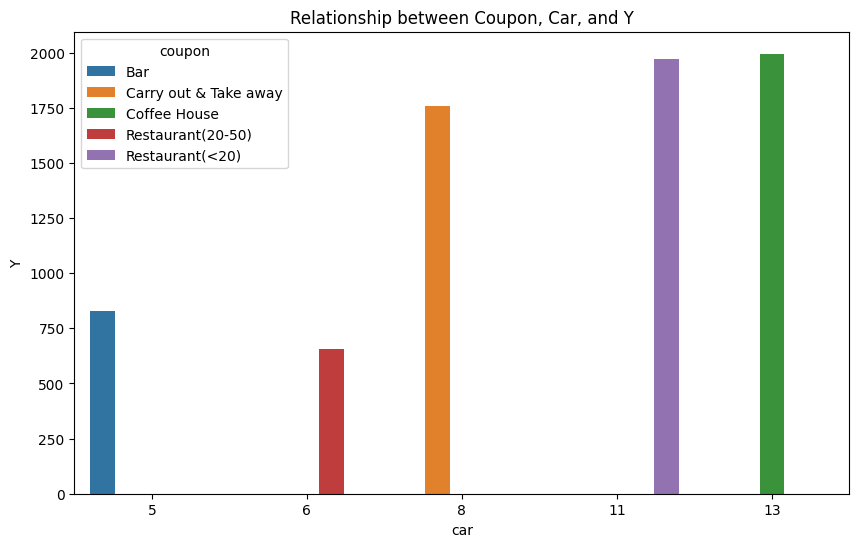

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='car', y='Y', hue='coupon', data=c)
plt.title('Relationship between Coupon, Car, and Y')
plt.xlabel('car')
plt.ylabel('Y')
plt.legend(title='coupon')
plt.show()

Most of the people who have car are using coupons when they visit coffeehouse or restaurants.So by this we can recommand coupons related to coffeehouse and restuarent to the carowners.

Coupon Usage by Income Level

<Figure size 2000x1500 with 0 Axes>

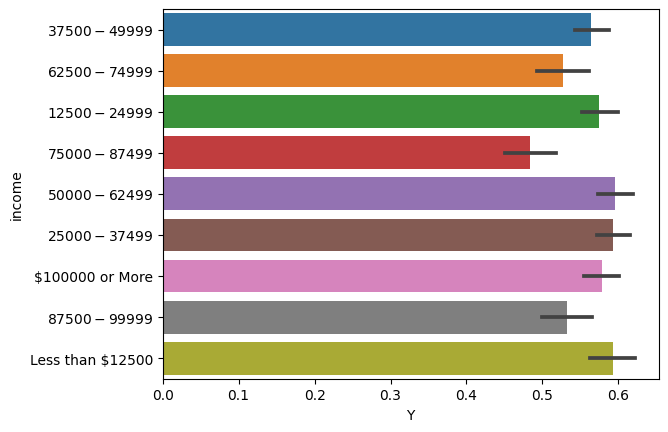

<Figure size 2000x1500 with 0 Axes>

In [ ]:
sns.barplot(x=dm['Y'],y=dm['income'])
plt.figure(figsize=(20,15))

People with income level ranging from 50000-62000,25000-37499 and lessthan 12500 are using much coupons.Only people with income 75000-8500 are the only ones who are not using coupons much

**CONCLUSION:**By the above vizualizations and algorithms we got to know that for our data set is best suitable for random forest classifier which  gives the best accuracy.When we observe the above graphs we can understand that usage of coupons is high when the passenger have leisure time to visit coffeehouse or restaurants and most people using coupons are the people aged betweem twenties to thirties and coming to income group people who have high income are not opting coupons much.So if we should recommand coupons to the passengers in non-working hours and mostly to the youngsters.